In [ ]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

TensorFlow 2.x selected.


In [ ]:
import tensorflow_datasets as tfds
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load("fashion_mnist",as_supervised=True,with_info=True)

In [ ]:
train, test = dataset["train"], dataset["test"]

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_ds, num_test_ds = metadata.splits["train"].num_examples, metadata.splits["test"].num_examples
print(f"train: {num_train_ds} test: {num_test_ds}")

train: 60000 test: 10000


In [ ]:
def normalize(img,label):
  img = tf.cast(img,tf.float32)
  return img/225,label
train = train.map(normalize).cache()
test = test.map(normalize).cache()

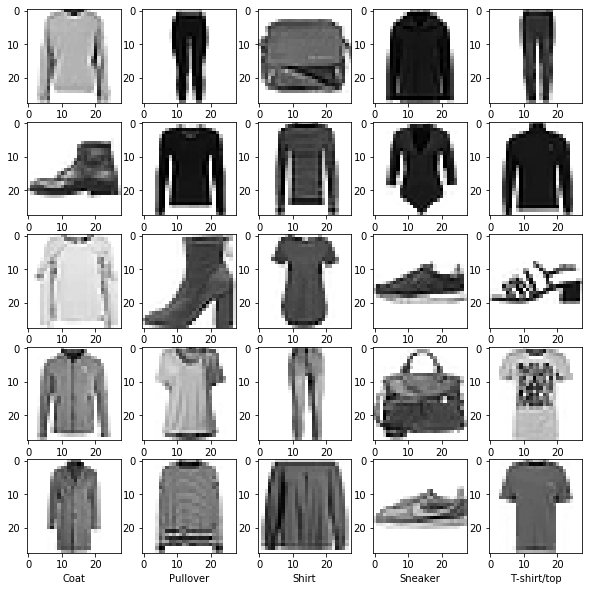

In [ ]:
i=0
plt.figure(figsize=(10,10))
for img,label in train.take(25):
  plt.subplot(5,5,i+1)
  plt.xlabel(class_names[label])
  plt.imshow(img.numpy().reshape(28,28),cmap=plt.cm.binary)
  i += 1
plt.show()

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),padding="same",activation=tf.nn.relu,input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D((2,2),strides=2),
        tf.keras.layers.Conv2D(64,(3,3),padding="same",activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D((2,2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)

])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics=["accuracy"])

In [ ]:
batch_size = 32
train, test = train.repeat().shuffle(num_train_ds).batch(batch_size), test.batch(batch_size)

In [ ]:
model.fit(train,epochs=10,steps_per_epoch=math.ceil(num_train_ds/batch_size))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5568 - accuracy: 0.9045
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5502 - accuracy: 0.9110
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5485 - accuracy: 0.9125
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5410 - accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5398 - accuracy: 0.9217
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5393 - accuracy: 0.9218
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5363 - accuracy: 0.9251
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5325 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5298 - accuracy: 0.9315
Epoch 10/10
1875/1875 [==============================] - 7s 4

In [ ]:
test_loss, test_accuracy = model.evaluate(test,steps=math.ceil(num_test_ds/batch_size))

313/313 [==============================] - 4s 12ms/step - loss: 1.5634 - accuracy: 0.8981


In [ ]:
for test_imgs, test_labels in test.take(1):
  test_imgs = test_imgs.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_imgs)

In [ ]:
print(f"Predicted :{np.argmax(predictions[0])} Actual :{test_labels[0]}, Shape :{predictions[0].shape}")

Predicted :4 Actual :4, Shape :(10,)


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0

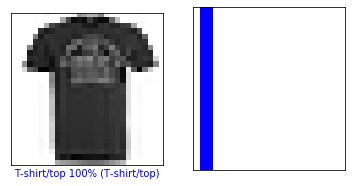

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
np.argmax(predictions[6])

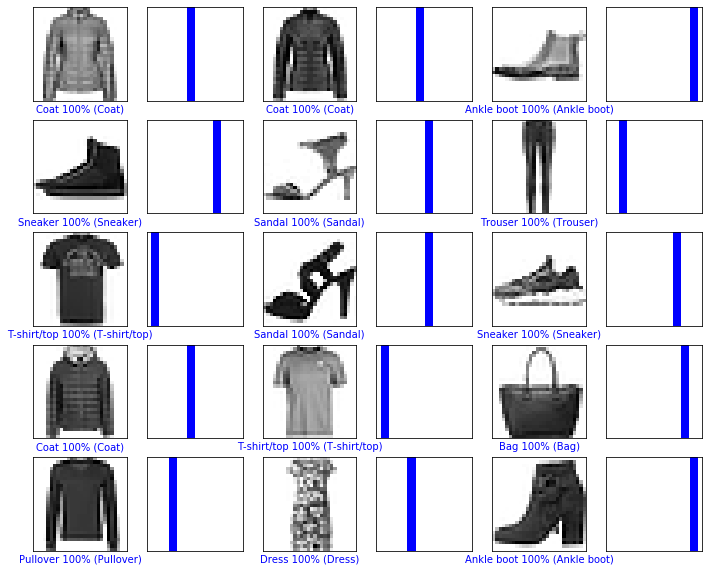

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
img = test_imgs[0]

print(img.shape)
img = np.array([img])

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)

(28, 28, 1)
(1, 28, 28, 1)
[[2.07532249e-20 1.93753074e-19 8.41939539e-12 1.25852808e-24
  9.99997497e-01 2.89305587e-32 2.46045647e-06 1.10017985e-26
  1.24945683e-19 1.04855246e-22]]


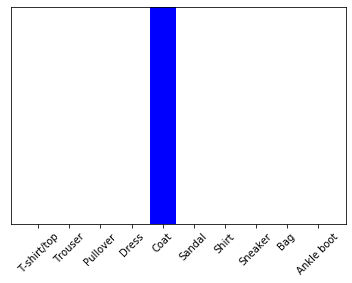

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)